In [1]:
import pandas as pd
from mylib.data import Data
from mylib.runner import TrainRunner
from mylib.helper import timeit, profile
from mylib.perturbator import K_Anonymity, SOM_K_Anonymity

In [2]:
data = Data()
X_train_origin, X_test_origin, y_train_origin, y_test_origin = data.train_test_split()

In [3]:
runners = []
# Creat a base model to compare the result.
original_runner = TrainRunner('Original')
runners.append(original_runner)
quasi_identifiers = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [4]:
def save(results, size, his):
    his['K-size'].append(size)
    his['Acc'].append(results['accuracy'])
    his['AUC'].append(results['auc_score'])
    his['Time'].append(results['preprocessed_time'])

In [5]:
# Choose different k size.
sizes = [5, 10]

# Record of K-Anonymous & SOM K-Anonymous with different K
k_anonymous_his = {'K-size': [], 'Acc': [], 'AUC': [], 'Time': []}
som_k_anonymous_his = {'K-size': [], 'Acc': [], 'AUC': [], 'Time': []}

for size in sizes:
    print(f'*Processing K = {size}')

    runner = TrainRunner(f'K Anonymous(k={size})', [K_Anonymity(quasi_identifiers, size)])
    som_runner = TrainRunner(f'SOM KDTree(k={size})', [SOM_K_Anonymity(quasi_identifiers, size)])

    runners.append(runner)
    runners.append(som_runner)

    pf = profile(runners, X_train_origin, y_train_origin,
                    X_test_origin, y_test_origin)
    
    save(pf[f'K Anonymous(k={size})'], size, k_anonymous_his)
    save(pf[f'SOM KDTree(k={size})'], size, som_k_anonymous_his)

5
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
10


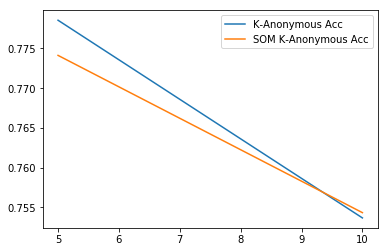

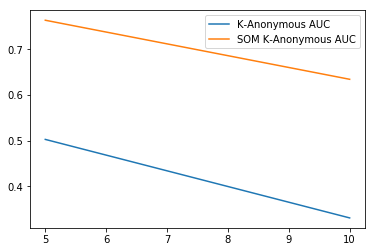

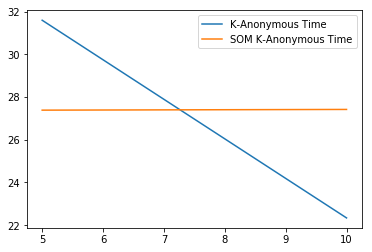

In [7]:
from mylib.plot import Plot

Plot(k_anonymous_his, som_k_anonymous_his)